<h3>
Привет! Спасибо, что сдал задание. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной:
</h3>
<p style="color:green">если комментарий зелёный - всё верно;</p>
<p style="color:orange">оранжевый - есть замечания, но не критично;</p>
<p style="color:red">красные - нужно переделать
 И так же не удаляй мои комментарии и постарайся учитывать замечания в них, если такие будут


### Выявления закономерностей, определяющих успешность цифровых игр для интернет-магазина на основе данных, собранных за предыдущий год.

   Для анализа были предоставлены данные о компьютерных играх, собранных из открыты источников и содержащие доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель: необходимо выявить закономерности, определяющие успешность цифровых игр и спрогнозировать продажи на следующий год** 

   В наборе данных есть аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Открыть файл с данными и изучить общую информацию

Импорт библиотек и первичная настройка

In [129]:
import pandas as pd # импорт библиотеки pandas
# установим данную опцию, чтобы посмотреть все колонки в таблице
pd.set_option('display.max_columns', 100)

In [130]:
import numpy as np # импорт библиотеки numpy

In [131]:
import matplotlib as mpl # импорт библиотеки matpotlib
import matplotlib.pyplot as plt # импорт pyplot для построения графиков
import seaborn as sns # импорт библиотеки seaborn
#печатать только первое появление совпадающих предупреждений, независимо от местоположения
import warnings; warnings.filterwarnings(action='once')
# зададим новые параметры для графиков
large = 22; med = 16; small = 12 # размеры
# словарь с параметрами
params = {'axes.titlesize': large, # размер заголовков осей
          'legend.fontsize': med, # размер шрифта легенд
          'figure.figsize': (16,10), # размер графика
          'axes.labelsize': med, # размер меток осей
          'axes.titlesize': med, # размер заголовков осей
          'xtick.labelsize': med, # размер названия оси - х
          'ytick.labelsize': med, # размер названия оси - y
          'figure.titlesize': large # размер названия графика
         }
plt.rcParams.update(params) # обновляем параметры, по которым будут построены графики
plt.style.use('seaborn-whitegrid') # изменяем стиль на seaborn - белая сетка
sns.set_style("white") # установили стиль - белый
%matplotlib inline
# С помощью этого бэкэнда вывод команд построения отображается 
# в виде строки внутри интерфейсов, таких как блокнот Jupyter,
# непосредственно под ячейкой кода, которая его создала.

Прочитаем файл, сохраненим его в переменную и посмотрим информацию о нём:

In [132]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [133]:
# функция выводит информацию о таблице с данными
# и показывает в процентах количество, пропусков в столбцах
def data_pass_percentage(dataset):
    print(dataset.info())
    print()
    print('Количество пропущенных данных в столбцах (в %):')
    pass_percentage = (dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending=False)
    return pass_percentage

In [134]:
data_pass_percentage(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Количество пропущенных данных в столбцах (в %):


Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Genre               0.011965
Name                0.011965
Other_sales         0.000000
JP_sales            0.000000
EU_sales            0.000000
NA_sales            0.000000
Platform            0.000000
dtype: float64

__Описание данных:__
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Вывод

В предоставленных для анализа данных наблюдается ряд проблем:

1) Необходимо переименовать столбцы в таблице, а именно привести их названия к нижнему реистру. Так же необходимо привести к нижнему регистру значения в столбце с названиями жанров игр

2) Заменить тип данных в столбцах: *year_of_release* (с *float* на *int*) и *user_score* (с *object* на *float*). В столбце *user_score* есть ячейки со строковым типом данных - tbd (перевод аббревиатуры: "будет определено")

3) Пропуски в данных стоит рассмотреть подробнее, так как некоторые из столбцов с данными состоят более чем на 40% из них. Пропуски данных в столбцах (year_of_release, genre, name) можно удалить в виду их незначительного количества. Определить причины по которым возникли пропуски в столбцах с данными о рейтине игр затруднительно. Есть три типа рейтингов: оценка пользователей, оценка профессиональных критиков и возрастной рейтинг от организации ESRB. Рейтинг от организации ESRB присваеватся только тем играм, которые реализовывались на терретории Северной Америки. Огромному количеству игр рейтинг не присваивали по причине их малой популярности (локализация только в определённых регионах/специфичных платформах (например, много однотипных игр из Японии)) и как следствие малыми продажами. Наиболее полными данные должны быть для игр локализованных на персональных компьютерах (ПК) в виду их распространённости.

<p style="color:green">Данные загружены и изучены, теперь можно присутпить к предобработке, отлично</p>

### Шаг 2. Подготовка данных

* Замена названий столбцов (приведение к нижнему регистру):

In [135]:
# приведение к нижнему регистру названий столбцов в таблице
games.columns = games.columns.str.lower()
# приведение к нижнему регистру строк в колонке с названиями жанров
games['genre'] = games['genre'].str.lower()

In [136]:
# переименование столбцов
games.set_axis(['game_name', 'platform', 'year_of_release', 'genre_name', 'na_sales', 'eu_sales', 
                'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb_rating'],
               axis = 'columns',inplace = True)

* Удалим пропуски в столбцах (year_of_release, genre, name) в виду их незначительного количества.

In [137]:
games.dropna(subset = ['year_of_release','genre_name','game_name'], inplace = True)

* Преобразование данных в нужные типы:

In [138]:
games['year_of_release'] = games['year_of_release'].astype('int')
# заменим значение tbd на индентификатор 0, перед преобразованием типа данных
games['user_score'] = games['user_score'].replace('tbd', '0')
games['user_score'] = games['user_score'].astype('float')

* Обработка оставшихся пропусков:

Оставшиеся пропуски было решено заполнить индентификаторами:

0 - ноль для рейтинга критиков и пользователей и

_ - пробел для возрастного рейтинга ESRB

Можно было попробовать заполнить пропуски медианными значениями рейтинга игры от критиков и пользователей, сгруппировав игры по жанрам, и аналогичным образом поступить с esrb рейтингом. Но учитывая причины возникновения этих пропусков (игры выпущенные до 2000 года, редкие платформы, специфика регионов реализации игр или низкую популярность некоторых игр), от данного метода заполнения пропусков было решено отказаться.

In [139]:
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['esrb_rating'] = games['esrb_rating'].fillna('_')

* Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [140]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [141]:
games.head()

,game_name,platform,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,sum_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,_,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,_,31.38


In [142]:
# посмотрим на информацию о таблице данных перед переходом к следующему этапу.
data_pass_percentage(games)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
game_name          16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre_name         16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
esrb_rating        16444 non-null object
sum_sales          16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None

Количество пропущенных данных в столбцах (в %):


sum_sales          0.0
esrb_rating        0.0
user_score         0.0
critic_score       0.0
other_sales        0.0
jp_sales           0.0
eu_sales           0.0
na_sales           0.0
genre_name         0.0
year_of_release    0.0
platform           0.0
game_name          0.0
dtype: float64

#### Вывод

В таблице с данными были переименованы столбцы, а данные приведены к нужным типам. Пропуски в столбцах с названиями игр, жанра и годом публикации были отброшены. Значительное количество пропусков в данных наблюдается в столбцах с различными рейтингами (более 40%). Возрастной рейтинг от ассоциации ESRB присваивался только играм, продаваемых в Северной Америке. Пропуски в рейтинге критиков и пользователей можно объяснить рядом причин: 1) низкая мировая популярность 2) игры появились раньше системы рейтингов/очень старые игры 3) локализация в специфичных регионах (например, Япония)/недоступность данных или их неактуальность для мира и др. менее распространённые причины. Поэтому было решено заполнить в этих данных с помощью индентификаторами - ноль или пробел. Также были посчитаны суммарные продажи игр в мире.

<p style="color:green">Типы данных заменили, с пропусками разобрались, можно приступать и к ванализу</p>

### Шаг 3. Исследовательский анализ данных

* Посмотрим на количество игр выпускаемых в разные годы.

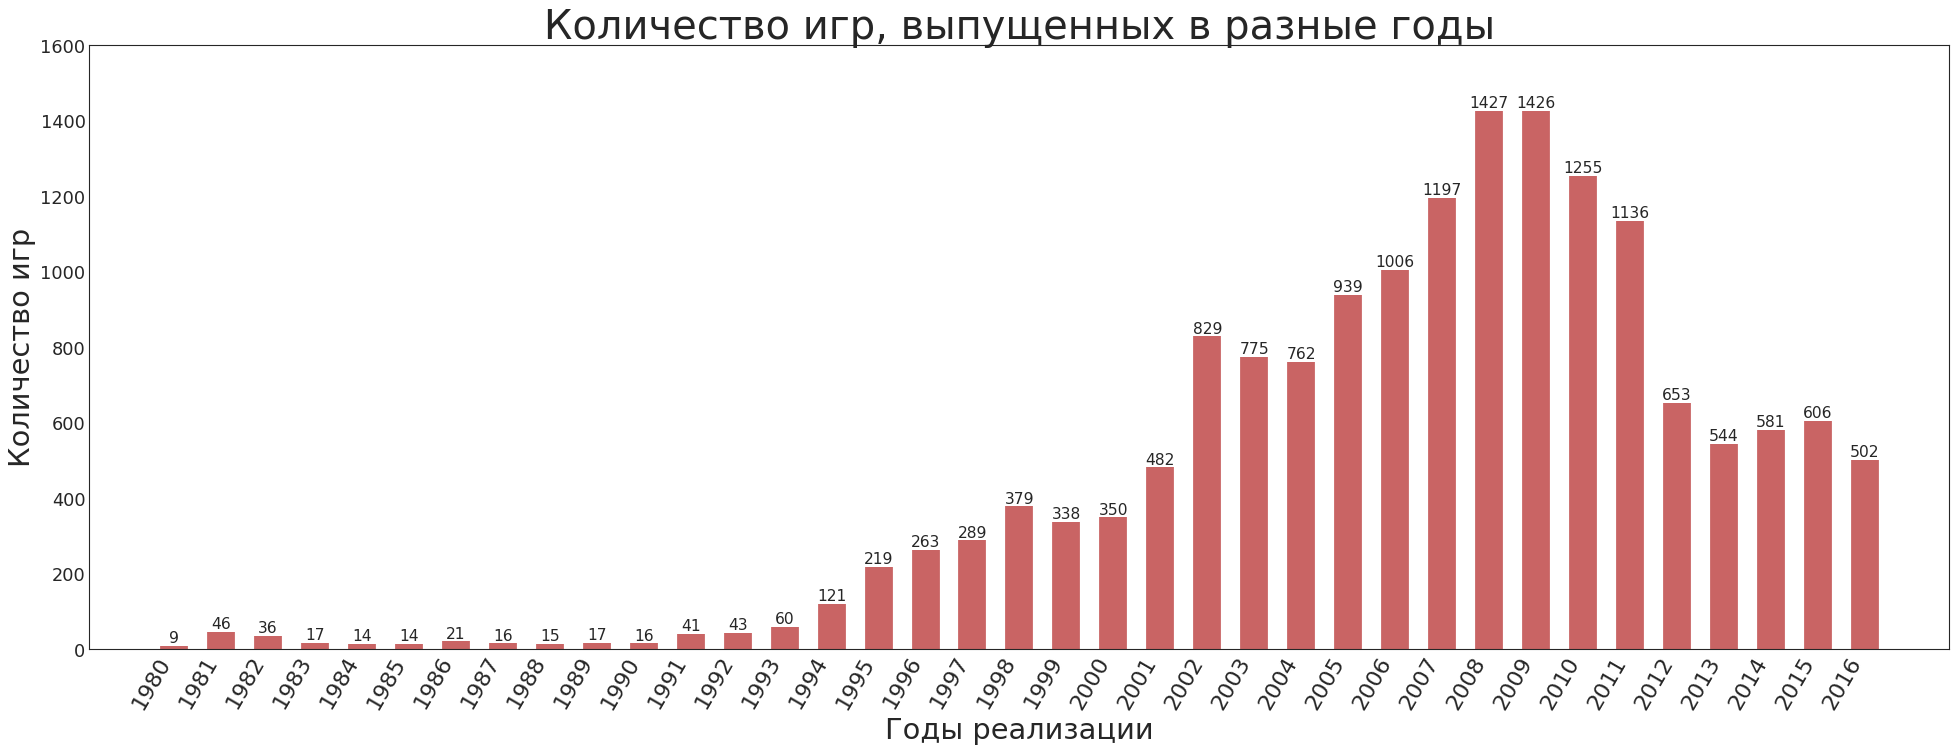

In [143]:
# сгруппируем данные по годам выхода игры и посчитаем их количество
games_by_year = games[['year_of_release']].groupby('year_of_release').apply(lambda x: x.count())
# переименуем столбец
games_by_year.set_axis(['number_of_games_released'], axis = 'columns',inplace = True)
games_by_year.reset_index(inplace=True) # избавимся от мультииндекса
# нарисуем гистограмму
fig, ax = plt.subplots(figsize=(30,10), facecolor='white', dpi= 80)
ax.vlines(x=games_by_year.year_of_release, ymin=0, ymax=games_by_year.number_of_games_released, 
          color='firebrick', alpha=0.7, linewidth=25)
# Title, Label, Ticks and Ylim
ax.set_title('Количество игр, выпущенных в разные годы', fontdict={'size':36})
ax.set_ylabel('Количество игр', fontdict={'size':26})
ax.set_xlabel('Годы реализации', fontdict={'size':26})
ax.set_xticks(games_by_year.year_of_release)
ax.set_xticklabels(games_by_year.year_of_release, rotation=60, fontdict={'horizontalalignment': 'right', 'size':20})
ax.set_ylim(0, 1600)

# Annotate
for row in games_by_year.itertuples():
    ax.text(row.year_of_release, row.number_of_games_released, s=row.number_of_games_released, 
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.show()

С конца 90-х и до 2009 наблюдается рост числа новых цифровых игр. Но уже в 2012 происходит снижение производства игр более чем в 2 раза. Возможно это связано с изменениями произоеими на рынке цифровых игр. Например, монополизация на рынке игровых консолей и стремление разработчиков игр максимально долго удерживать пользователя в игре (выпуск дополнительного платного контента и ввод подписок, когда доступ к игре предоставляется на определённое время за плату). Учитывая эти тенденции и в будущем, то не имеет смысла рассматривать данны за все периоды. Можно остановится на играх выпуенных в последние 4-5 лет, кроме того в настоящий момент каждые 4-5 лет появляются новые технологии, которые в том числе могут сильно изменить рынок цифровых игр.

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сперва посмотрим на список названий игровых платформ и их количество:

In [144]:
platform_name = games['platform'].unique()
print('Список уникальных названий платформ:', platform_name)
platform_name_len = len(platform_name)
print('Всего платформ:', platform_name_len)

Список уникальных названий платформ: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Всего платформ: 31


Так как платформ много имеет смысл отобрать из них, например, топ-10 по продажам за всё время их существования. 

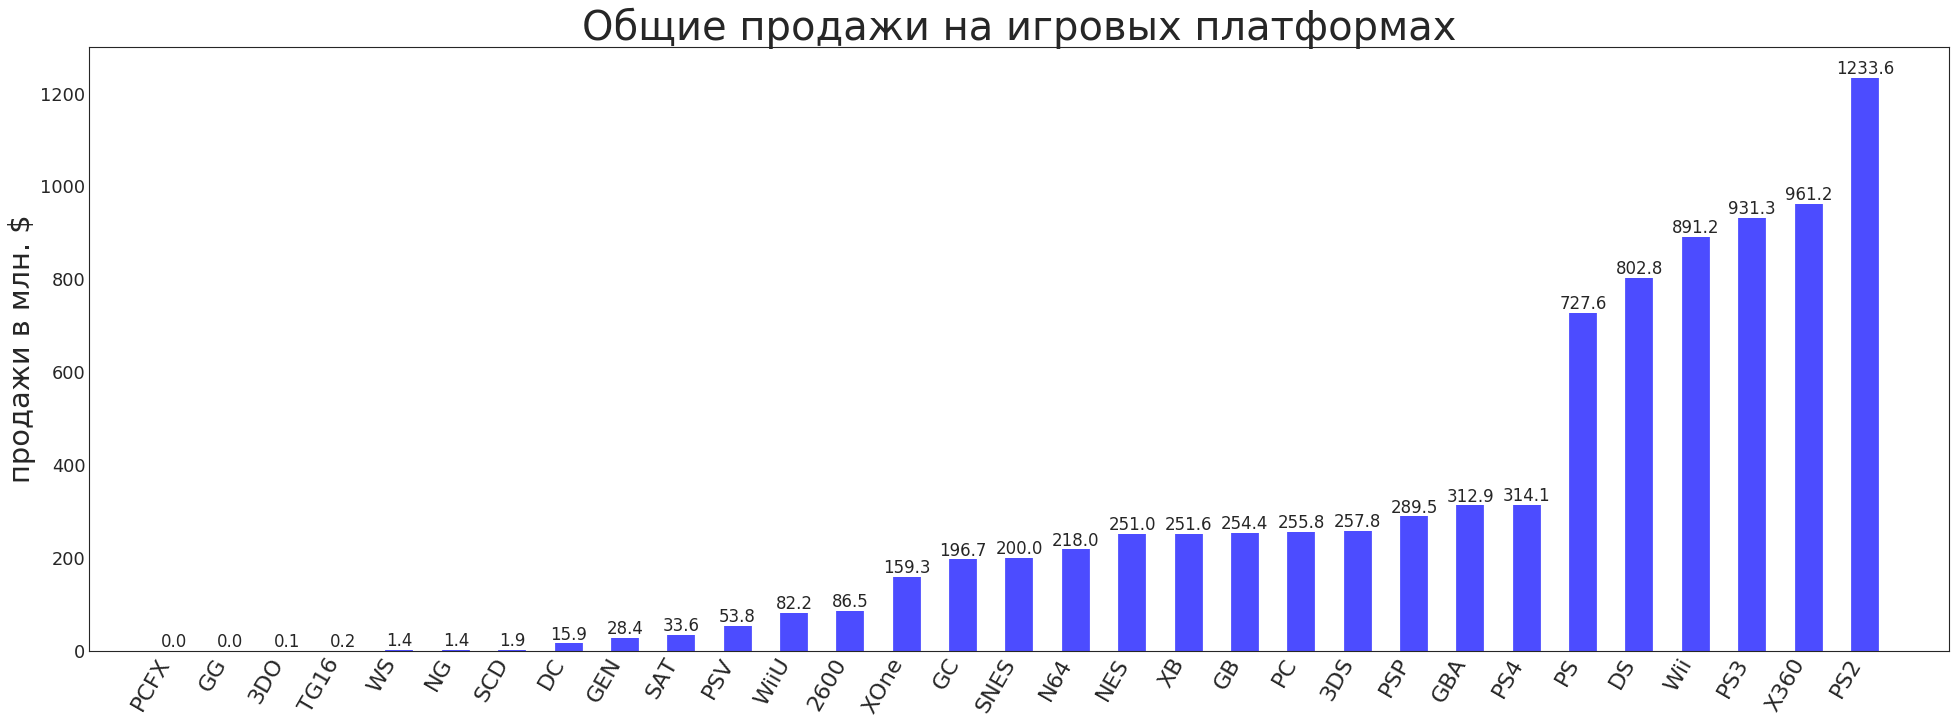

In [145]:
# сгруппируем данные по платформам и найдём суммарные продажи за все года:
games_by_year = games.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
games_by_year.sort_values('sum_sales', inplace=True)
games_by_year.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(30,10), facecolor='white', dpi= 80)
ax.vlines(x=games_by_year.platform, ymin=0, ymax=games_by_year.sum_sales, 
          color='blue', alpha=0.7, linewidth=25)

# Annotate
for row in games_by_year.itertuples():
    ax.text(row.platform, row.sum_sales, s=round(row.sum_sales, 1), horizontalalignment= 'center', 
            verticalalignment='bottom', fontsize=15)
    
# Title, Label, Ticks and Ylim
ax.set_title('Общие продажи на игровых платформах', fontdict={'size':36})
ax.set_ylabel('продажи в млн. $', fontdict={'size':26})
ax.set_xticklabels(games_by_year.platform, rotation=60, 
                   fontdict={'horizontalalignment': 'right', 'size':20})
ax.set_ylim(0, 1300)
plt.show()

Выберим 18 платформ с общими продажами выше 100 млн.$. Так как стоит учитывать, что продажи в последние 5 лет упали более чем в два раза по сравннию с аналогичным предыдущем периодом.

In [146]:
# отбросим платформы с общими проажами ниже 100 млн.$
games_by_year = games_by_year.query('sum_sales > 100')
top_platform = games_by_year['platform'].unique() # список топа_платформ по продажам
# сводная таблица по платформам, годам и годовые продажи
platform_sales = games.pivot_table(index = ['platform','year_of_release'], 
                                values = 'sum_sales', aggfunc = 'sum').reset_index()
# отфильтруем таблицу по платформам, входяими в наш топ.
platform_sales = platform_sales.query('platform in @top_platform') 
platform_sales

,platform,year_of_release,sum_sales
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


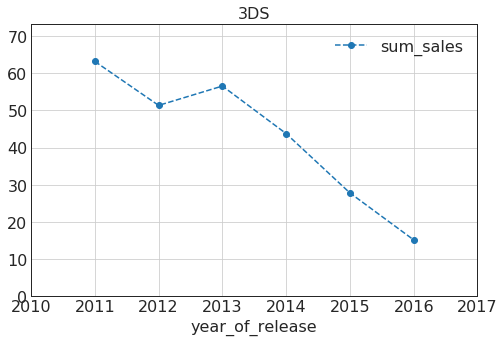

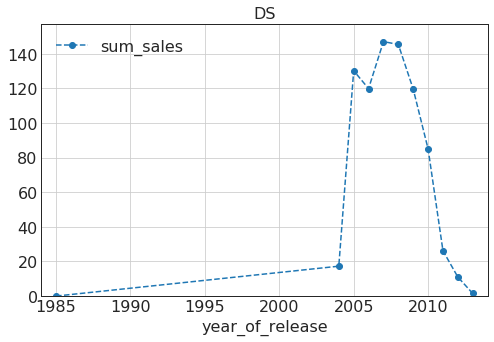

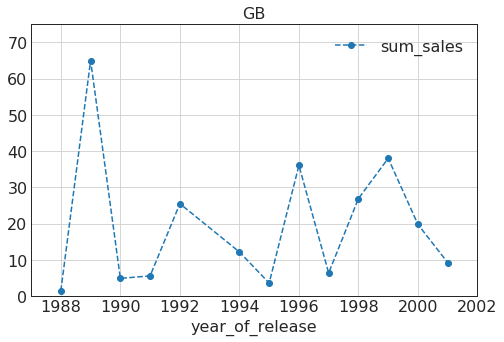

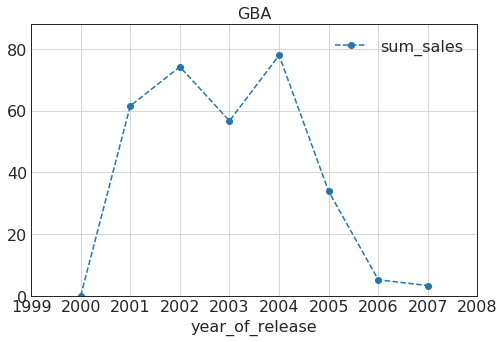

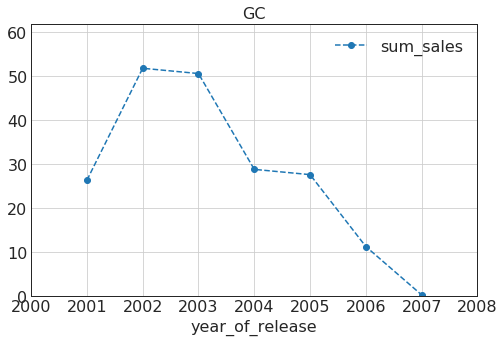

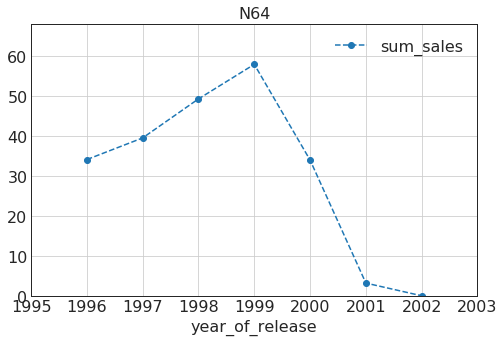

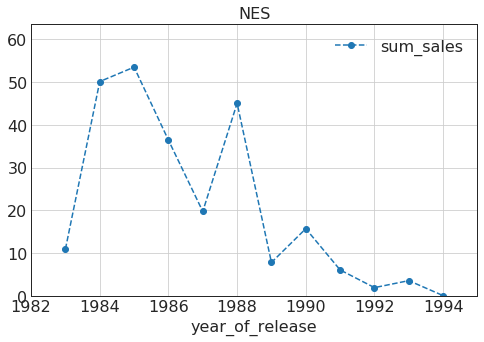

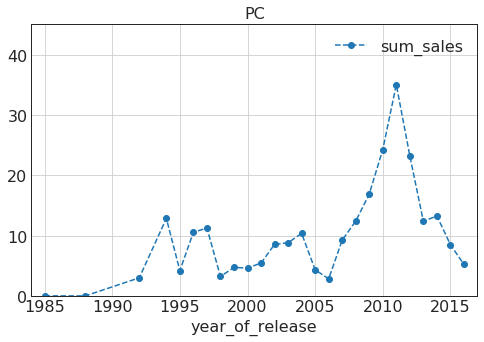

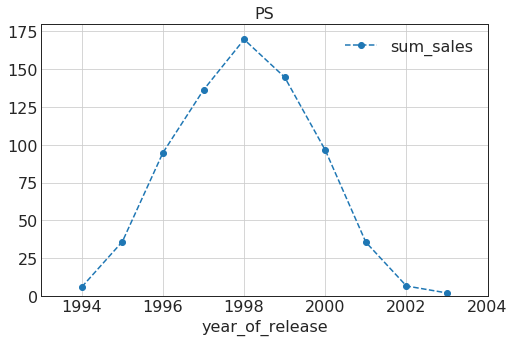

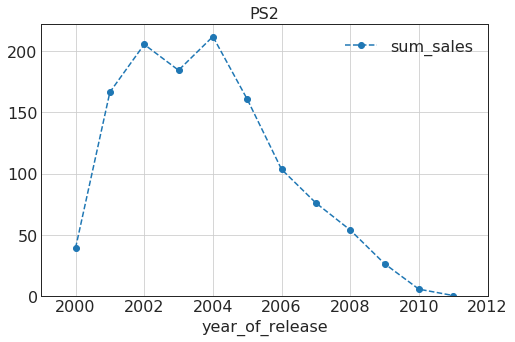

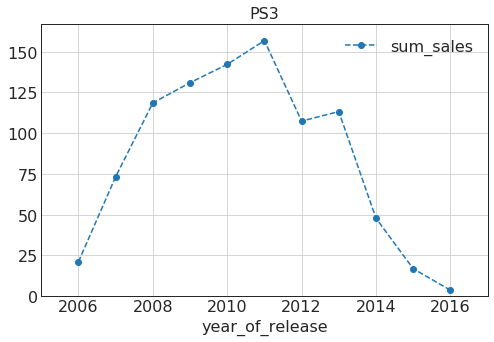

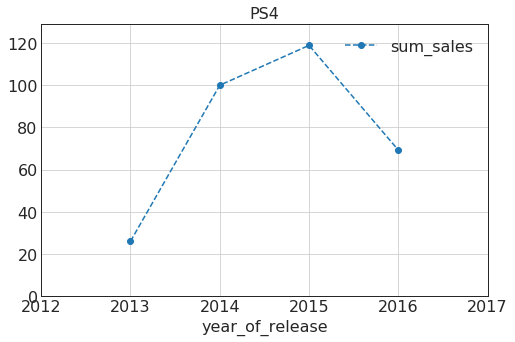

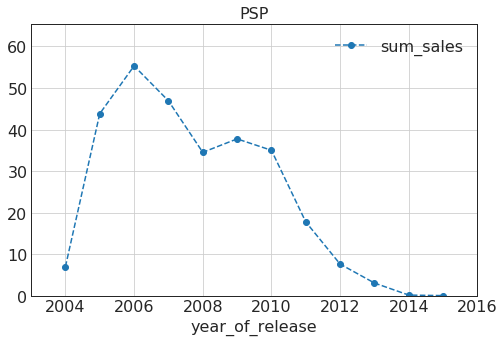

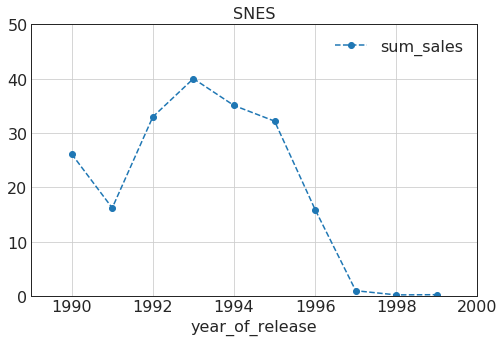

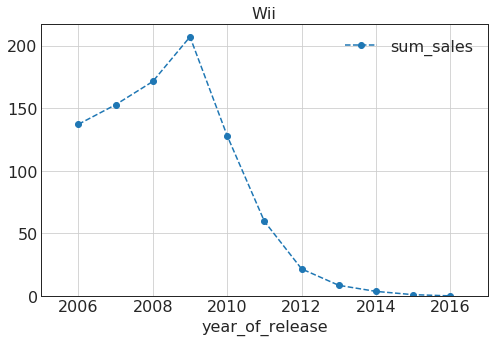

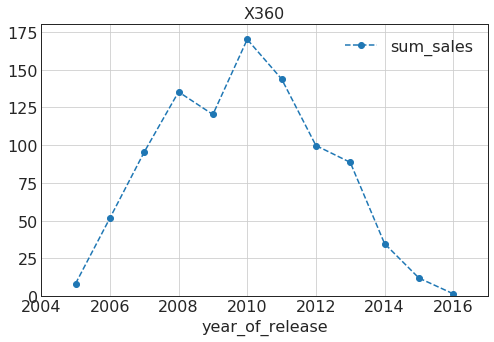

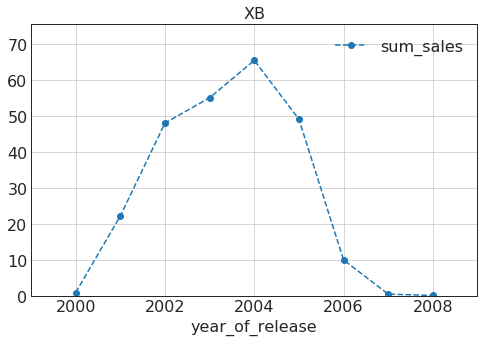

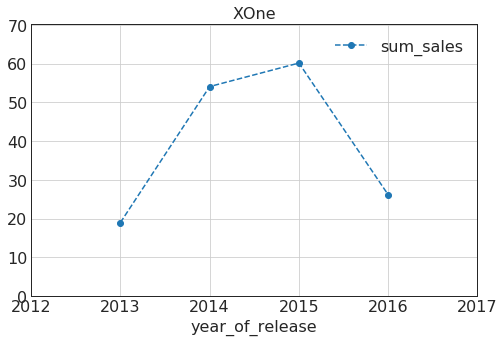

In [147]:
platform_sales_name = platform_sales['platform'].unique() # список уникальных названий платформ из топа
# для каждой платформы построим график суммарных продаж по годам
list_emerging = [] # пустой список с датами появления платформ на рынке
list_death = [] # пустой список существования платформы на рынке
for i in platform_sales_name:
    #разбиение таблицы на данные только по одной платформе
    dataset = platform_sales.query('platform == @i') 
    dataset.plot(x='year_of_release', y='sum_sales', style='--o', xlim=(dataset['year_of_release'].min()-1, dataset['year_of_release'].max()+1), ylim=(0, dataset['sum_sales'].max()+10), 
                                        grid=True, figsize=(8, 5), title=i)
    list_emerging.append(dataset['year_of_release'].min())
    if dataset['year_of_release'].max() != 2016:
        list_death.append(dataset['year_of_release'].max()-dataset['year_of_release'].min())
    plt.show()

<p style="color:green">Визуализации ты отлично освоил, молодец!</p>

In [148]:
print(list_emerging)
print(list_death)

[2011, 1985, 1988, 2000, 2001, 1996, 1983, 1985, 1994, 2000, 2006, 2013, 2004, 1990, 2006, 2005, 2000, 2013]
[28, 13, 7, 6, 6, 11, 9, 11, 11, 9, 8]


In [149]:
# для платформы DS изменили время жизни, так как эта платформа была перезапущенна в 2004 году
list_death[0] = 10
# соответственно для неё изменили время появления на рынке
list_emerging[1] = 2004
# для платформы PC также было изменено время появления на 1993, так как по данным именно с этого
# года начался постоянный выпуск игр для этой платформы, а компьютеры стали массово персональными.
list_emerging[7] = 1993

In [150]:
print(list_emerging)
print(list_death)

[2011, 2004, 1988, 2000, 2001, 1996, 1983, 1993, 1994, 2000, 2006, 2013, 2004, 1990, 2006, 2005, 2000, 2013]
[10, 13, 7, 6, 6, 11, 9, 11, 11, 9, 8]


Найдём среднее время существования платформ на рынке:

In [151]:
print('В среднем игровые платформы существуют на рынке:', round(np.mean(list_death)), 'лет')
print('Медианное время существования игровых платформ на рынке:', round(np.median(list_death)), 'лет')

В среднем игровые платформы существуют на рынке: 9.0 лет
Медианное время существования игровых платформ на рынке: 9.0 лет


Рассчитаем среднее время появления новых платформ:

In [152]:
# отсортируем список с годами появления новых платформ по возрастанию
list_emerging.sort()
# в этот пустой список будут записаны временные промежутки между появлением новых платформ
# как разница в годах между элементом j+1 и j.
list_emerging_new = [] 
j=0
while j < len(list_emerging) - 1:
    list_emerging_new.append(list_emerging[j+1] - list_emerging[j])
    j += 1

In [153]:
print(list_emerging)

[1983, 1988, 1990, 1993, 1994, 1996, 2000, 2000, 2000, 2001, 2004, 2004, 2005, 2006, 2006, 2011, 2013, 2013]


In [154]:
list_emerging_new

[5, 2, 3, 1, 2, 4, 0, 0, 1, 3, 0, 1, 1, 0, 5, 2, 0]

In [155]:
print('Среднее время появления новых платформ:', round(np.mean(list_emerging_new)), 'года')
print('Медианное время появления игровых платформ на рынке:', round(np.median(list_emerging_new)), 'год')

Среднее время появления новых платформ: 2.0 года
Медианное время появления игровых платформ на рынке: 1.0 год


Выберем данные за актуальный период. Для этого сперва определим критерии актуального периода исходя из ранее полученных данных:
* платформа присутствует на рынке на момент 2016 года
* платформа находится на рынке не более 6 лет (2/3 среднего времени существования игровых платформ на рынке, исключением является PC-персональный компьютер)
* игры, вышедшие с 2014 по 2016 года (из-за глобального снижения продаж игр и постоянного обновления технолоий)

Данным условием соответствуют только 4 платформы: 3DS, PC, PS4, XOne

In [156]:
platform_list = {'3DS','PC','PS4','XOne'}
games_new = games.query('platform in @platform_list & year_of_release >= 2014')
games_new.head()

,game_name,platform,year_of_release,genre_name,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,_,14.63
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,0.0,0.0,_,11.68
77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,0.0,0.0,_,7.98


Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

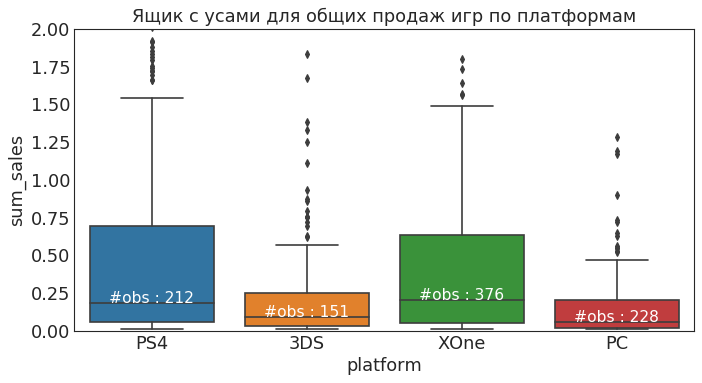

In [157]:
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.boxplot(x='platform', y='sum_sales', data=games_new, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values # число наблюдений
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(games_new,group_col='platform',y='sum_sales')    

# Decoration
plt.title('Ящик с усами для общих продаж игр по платформам', fontsize=16)
plt.ylim(0, 2)
plt.show()

In [158]:
for i in platform_list:
    data = games_new.query('platform == @i')
    min_v = round(data['sum_sales'].mean(),2)
    print('Средние продажи на платформе:',i,'равно',min_v,'млн.$')

Средние продажи на платформе: XOne равно 0.62 млн.$
Средние продажи на платформе: PS4 равно 0.77 млн.$
Средние продажи на платформе: 3DS равно 0.41 млн.$
Средние продажи на платформе: PC равно 0.18 млн.$


Наибольшее число продаж приходится на платформe - XOne. При этом разница в средних продажах для PS4 и XOne не велика, а для PS4 эта величинв наибольшая.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграммы рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [159]:
def score_sales_corr(df,cols,platform_name):
    # уберём из таблицы индентификаторные значения - 0
    data = df.query('platform == @platform_name & critic_score != 0 & user_score !=0')
    sns_plot = sns.pairplot(data[cols])
    data = data[cols]
    return sns_plot, data.corr()

(<seaborn.axisgrid.PairGrid at 0x7f2878688650>,
               critic_score  user_score  sum_sales
 critic_score      1.000000    0.466099   0.172061
 user_score        0.466099    1.000000  -0.089974
 sum_sales         0.172061   -0.089974   1.000000)

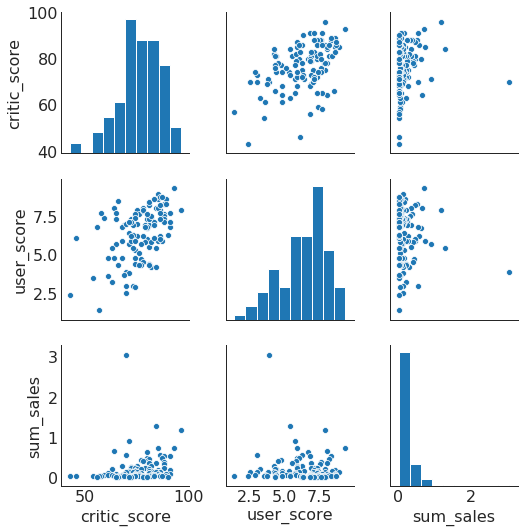

In [160]:
cols = ['critic_score','user_score','sum_sales']
score_sales_corr(games_new, cols, 'PC')

(<seaborn.axisgrid.PairGrid at 0x7f2877bfcc10>,
               critic_score  user_score  sum_sales
 critic_score      1.000000    0.862485   0.284686
 user_score        0.862485    1.000000   0.279850
 sum_sales         0.284686    0.279850   1.000000)

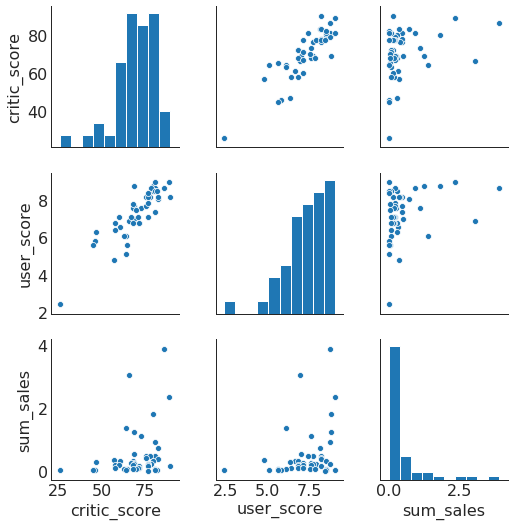

In [161]:
score_sales_corr(games_new, cols, '3DS')

(<seaborn.axisgrid.PairGrid at 0x7f2878538210>,
               critic_score  user_score  sum_sales
 critic_score      1.000000    0.546434   0.401903
 user_score        0.546434    1.000000  -0.043186
 sum_sales         0.401903   -0.043186   1.000000)

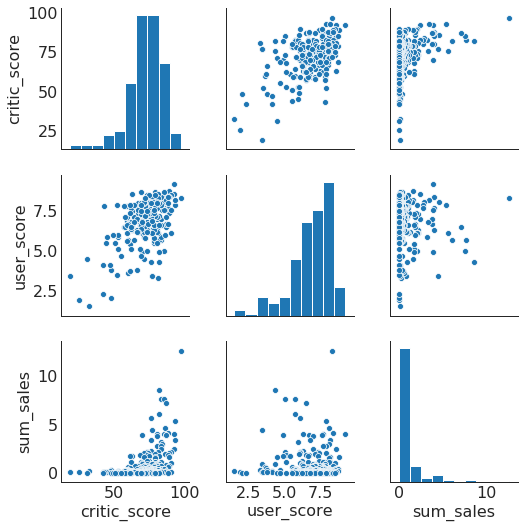

In [162]:
score_sales_corr(games_new, cols, 'PS4')

(<seaborn.axisgrid.PairGrid at 0x7f287861b590>,
               critic_score  user_score  sum_sales
 critic_score      1.000000    0.440977   0.422112
 user_score        0.440977    1.000000  -0.091734
 sum_sales         0.422112   -0.091734   1.000000)

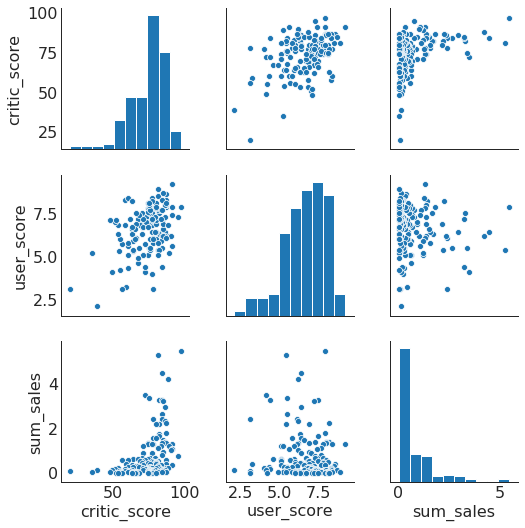

In [163]:
score_sales_corr(games_new, cols, 'XOne')

Из диаграм рассеяния рейтина критиков и пользователей для четырёх выбранных платформ видно, что для трёх платформ PC, PS4 и XOne отсутствует зависимость общих продаж игры от мнения пользователей. Мнение критиков ирает большее значение для платформ PS4 и XOne, так как наблюдается слабая положительная корреляция между общими продажами и рейтингом игр от критиков.

Посмотрите на общее распределение игр по жанрам.

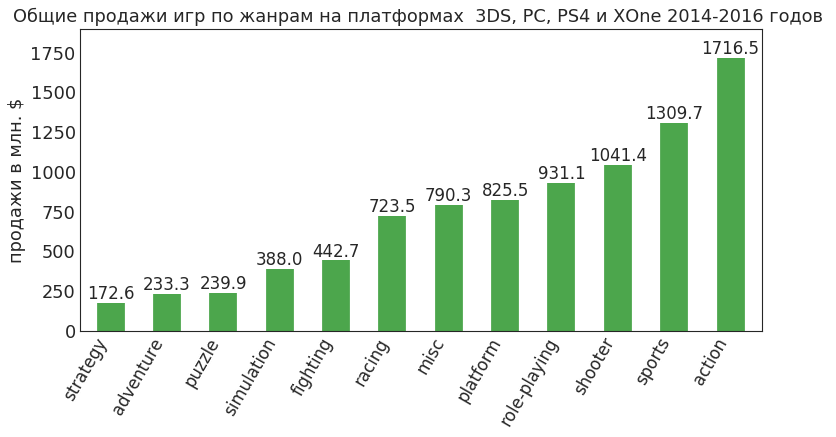

In [164]:
games_by_genre = games.pivot_table(index = 'genre_name', values = 'sum_sales', aggfunc = 'sum')
games_by_genre.sort_values('sum_sales', inplace=True)
games_by_genre.reset_index(inplace=True)
# Draw plot
fig, ax = plt.subplots(figsize=(11,5), facecolor='white', dpi= 80)
ax.vlines(x=games_by_genre.genre_name, ymin=0, ymax=games_by_genre.sum_sales, 
          color='green', alpha=0.7, linewidth=25)

# Annotate
for row in games_by_genre.itertuples():
    ax.text(row.genre_name, row.sum_sales, s=round(row.sum_sales, 1), horizontalalignment= 'center', 
            verticalalignment='bottom', fontsize=15)
    
# Title, Label, Ticks and Ylim
ax.set_title('Общие продажи игр по жанрам на платформах  3DS, PC, PS4 и XOne 2014-2016 годов ', 
             fontdict={'size':16})
ax.set_ylabel('продажи в млн. $', fontdict={'size':16})
ax.set_xticklabels(games_by_genre.genre_name, rotation=60, 
                   fontdict={'horizontalalignment': 'right', 'size':15})
ax.set_ylim(0, 1900)
plt.show()

Самым популярным жанром является - action, за ним уже идут по популярности иры в жанре sports, shooter и role-playing. Самыми неприбыльными жанрами являются - strategy, adventure и puzzle. Это говорит о том, что наибольшую прибыль приносят игры развлекательного характера, не требующие от игрока глубоких размышлений.

#### Выводы

На основе данных данных о количестве выпускаемых игр по годам, ибщих продащ игр по платформам, и средней продолжительности существования платформы на рынке для дальнейшего анализа были выбраны четыре основные платформы: 3DS, PC, PS4, XOne и игры на них, выпущенные с 2014 по 2016 года. Установленно, что наибольшие средние продажи приходится на две платформы PS4 и XOne, при этом за исследованный период на XOne вышло на 164 игры больше чем на PS4. Диаграммы рассеяния и коэффициенты корреляции Пирсона показывают, что общие продажи игр на основных платформах (PS4 и XOne) имеют слабую зависимость от мнения профессиональных критиков и не зависят от рейтинга пользователей. Среди игр наиболее популярным/прибыльным жанром является - action, а наименее прибыльным - strategy.

<p style="color:green">Платформы проанализированны, класс! Очень подробно и детально описан каждый пункт, здорово! теперь можно посмотреть и на портреты пользователей по регионам</p>

### Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5) и различия в долях продаж.
* Самые популярные жанры (топ-5). Пояснить разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для исследуемых регионов будем рассматривать только игры выпущенные в 2016 году

In [165]:
# функция для нажождения топ-5 значений общих продаж и доли продаж игр на платформе
def top_platform(df):
    games_top_platform = df.pivot_table(index = 'platform', 
                                values = 'na_sales', aggfunc = 'sum')
    games_top_platform.sort_values('na_sales', inplace=True, ascending = False)
    games_top_platform.reset_index(inplace=True)
    sum_v = games_top_platform['na_sales'].sum()
    games_top_platform['share_of_sale_%'] = round(games_top_platform['na_sales'].apply(lambda x : x / sum_v * 100),1)
    return games_top_platform.head()

In [166]:
games_NA = games.query('year_of_release == 2016 & na_sales >0')
games_NA_region = games_NA.pivot_table(index = ['platform','genre_name'], 
                                values = 'na_sales', aggfunc = 'sum').reset_index()
top_platform(games_NA_region)

,platform,na_sales,share_of_sale_%
0,PS4,21.49,47.8
1,XOne,14.27,31.8
2,3DS,4.14,9.2
3,WiiU,2.10,4.7
4,PC,1.36,3.0


In [167]:
games_EU = games.query('year_of_release == 2016 & eu_sales >0')
games_EU_region = games_EU.pivot_table(index = ['platform','genre_name'], 
                                values = 'na_sales', aggfunc = 'sum').reset_index()
top_platform(games_EU_region)

,platform,na_sales,share_of_sale_%
0,PS4,19.71,46.9
1,XOne,13.79,32.8
2,3DS,3.76,8.9
3,WiiU,2.10,5.0
4,PC,1.33,3.2


In [168]:
games_JP = games.query('year_of_release == 2016 & jp_sales >0')
games_JP_region = games_JP.pivot_table(index = ['platform','genre_name'], 
                                values = 'na_sales', aggfunc = 'sum').reset_index()
top_platform(games_JP_region)

,platform,na_sales,share_of_sale_%
0,PS4,15.80,71.3
1,3DS,3.97,17.9
2,WiiU,1.84,8.3
3,XOne,0.30,1.4
4,PS3,0.12,0.5


Топ-5 платформ по продажам в Европе и Северной Америке один и тотже. Если в Европе и Северной Америке основные продажи приходятся на две платформы (PS4 и XOne)  в то время как в Японии большеговсего продаж приходится так же на две платформы (PS4 и 3DS)

In [169]:
# функция для нажождения топ-5 жанров игр по общим продаж и доли продаж игр данного жанра
def top_genre(df):
    games_top_genre = df.pivot_table(index = 'genre_name', 
                                values = 'na_sales', aggfunc = 'sum')
    games_top_genre.sort_values('na_sales', inplace=True, ascending = False)
    games_top_genre.reset_index(inplace=True)
    sum_v = games_top_genre['na_sales'].sum()
    games_top_genre['share_of_sale_%'] = round(games_top_genre['na_sales'].apply(lambda x : x / sum_v * 100),1)
    return games_top_genre.head()

In [170]:
top_genre(games_NA_region)

,genre_name,na_sales,share_of_sale_%
0,shooter,16.24,36.1
1,action,9.29,20.7
2,sports,7.54,16.8
3,role-playing,5.89,13.1
4,fighting,1.84,4.1


In [171]:
top_genre(games_EU_region)

,genre_name,na_sales,share_of_sale_%
0,shooter,15.99,38.0
1,action,7.67,18.2
2,sports,7.46,17.7
3,role-playing,5.81,13.8
4,fighting,1.77,4.2


In [172]:
top_genre(games_JP_region)

,genre_name,na_sales,share_of_sale_%
0,shooter,8.05,36.3
1,role-playing,4.85,21.9
2,action,3.96,17.9
3,sports,1.99,9.0
4,fighting,1.60,7.2


Топ-5 самых популярных жанров для Северной Америки и Европы индентичны. Для Японии тот же самый набор популярных жанров. Стоит отметить, что вторым по популярности жанром в Японии является role-playing. Возможно различия в рейтингах вызваны культурными различиями. Если Северная Америка и Европа близки по культуре, то Японская культура является более самобытной. 

Рейтинг ESRB присваивается ирам реализуемых только в Северной Америке:

In [173]:
# создадим сводную таблицу по рейтингу esrb
games_NA_esrb = games_NA.pivot_table(index = 'esrb_rating', 
                                values = 'na_sales', aggfunc = 'sum').reset_index()
# удалим из таблицы индентификаторы - _
games_NA_esrb = games_NA_esrb.query('esrb_rating != "_"') 
games_NA_esrb.sort_values('na_sales', inplace=True, ascending = False)
games_NA_esrb # данные за 2016 год

,esrb_rating,na_sales
2,M,15.67
3,T,8.95
0,E,7.97
1,E10+,3.81


Расшифровка значений рейтинга ESRB:
* E - для всех (от 6 лет)
* E10+ - для всех от 10 лет и старше
* T - подросткам (от 13 лет)
* M - для взрослых (от 17 лет)

Из таблицы видно что рейтинг ESRB не влияет на продажи. Не стоит забывать, что индустрия компьютерных игр росла вместе со своими пользователями и к 2016 году многие из них были уже совершеннолетними. Кроме того отсутствуют серьёзные барьеры для реализации игр с рейтингом М, так как зачастую никто не может проверить подленный возраст зарегистрированного пользователя.

#### Вывод

На 2016 год портрет пользователя по регионам:
самой популярной игровой платформой в мире является PS4, которая в Северной Америке и Европе конкурирует с XOne, а в Японии с 3DS. Жанры, входящие в топ-5, одинаковы во всех трёх основных регионах, но для Японии есть некоторые различия в популярности среди этих жанров. Отмечено, что на продажи влияет рейтинг профессиональных критиков. Так же стоит отметить, что больинство игроков выросли вместе с игровой индустрией и являются совершеннолетними, т.е. платёжеспособными (высокие продажи игр с рэйтингом М за 2016 г). Игры с другими рейтингами по-видемому выходят не каждый год, поэтому стоит ориентироваться на игры с рейтингом (Е, Т и М).

<p style="color:green">Портреты пользователей построены, все выводы правильные, продолжай в том же духе!</p>

### Шаг 5. Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Пороговое значение alpha зададим равным 0.05

Для проверки гипотезы о равенстве средних пользовательских рейтингов для платформ XOne и PC соберём все данные в одну таблицу:

In [174]:
hypothesis_platform_user_score = games[['platform','user_score']] # нужные столбцы из исходной таблицы
# оставим в таблице только строки с ненулевыми рейтингами для платформ XOne и PC
hypothesis_platform_user_score = hypothesis_platform_user_score.query('(platform == "XOne" | platform == "PC") & user_score != 0')
hypothesis_platform_user_score.head()

,platform,user_score
85,PC,7.6
138,PC,7.3
165,XOne,7.9
179,XOne,5.4
192,PC,4.0


Имеем две генеральные совокупности: рейтинг игр на платформе XOne и PC.

In [175]:
xone_user_score = hypothesis_platform_user_score.query('platform == "XOne"')
pc_user_score = hypothesis_platform_user_score.query('platform == "PC"')

Нулевая гипотеза: средние пользовательские рейтинги игр на платформах Xbox One и PC одинаковые (т.е. они равны друг другу)

Альтернативная гипотеза: средние пользовательские рейтинги игр на платформах Xbox One и PC различается (т.е они не равны)

In [176]:
from scipy import stats as st
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(
    xone_user_score['user_score'], 
    pc_user_score['user_score'], equal_var = False)
# Студенческий т-тест
print('p-значение:', results.pvalue) # вывод на экран получившееся p-значение)
if (results.pvalue < alpha): # сравните получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
xone_user_score_mean = xone_user_score['user_score'].mean()
pc_user_score_mean = pc_user_score['user_score'].mean()
print('Средний рейтинг игр на платформе Xbox One: {:.2f}'.format(xone_user_score_mean))
print('Средний рейтинг игр на платформе PC: {:.2f}'.format(pc_user_score_mean))

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу
Средний рейтинг игр на платформе Xbox One: 6.52
Средний рейтинг игр на платформе PC: 7.07


вывод: по-видемому средний рейтинг игр на платформах Xbox One и PC различается

Для проверки гипотезы о неравенстве средних пользовательских рейтингов игр жанров Action (англ. «действие») и Sports (англ. «виды спорта») соберём все данные в одну таблицу:

In [177]:
hypothesis_genre_user_score = games[['genre_name','user_score']] # нужные столбцы из исходной таблицы
# оставим в таблице только строки с ненулевыми рейтингами для платформ XOne и PC
hypothesis_genre_user_score = hypothesis_genre_user_score.query('(genre_name == "action" | genre_name == "sports") & user_score != 0')
hypothesis_genre_user_score.head()

,genre_name,user_score
0,sports,8.0
3,sports,8.0
13,sports,7.7
15,sports,7.4
16,action,8.2


Имеем две генеральные совокупности: рейтинг игр в жанре Action и Sports.

In [178]:
action_user_score = hypothesis_genre_user_score.query('genre_name == "action"')
sports_user_score = hypothesis_genre_user_score.query('genre_name == "sports"')

Нулевая гипотеза: средние пользовательские рейтинги игр в жанре Action и Sports одинаковые (т.е. они равны друг другу)

Альтернативная гипотеза: средние пользовательские рейтинги игр в жанре Action и Sports различаются (т.е они не равны)

In [179]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(
    action_user_score['user_score'], 
    sports_user_score['user_score'], equal_var = False)
# Студенческий т-тест
print('p-значение:', results.pvalue) # вывод на экран получившееся p-значение)
if (results.pvalue < alpha): # сравните получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
action_user_score_mean = xone_user_score['user_score'].mean()
sports_user_score_mean = pc_user_score['user_score'].mean()
print('Средний рейтинг игр в жанре Аction: {:.2f}'.format(action_user_score_mean))
print('Средний рейтинг игр в жанре Sports: {:.2f}'.format(sports_user_score_mean))

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу
Средний рейтинг игр в жанре Аction: 6.52
Средний рейтинг игр в жанре Sports: 7.07


вывод: по-видемому средний рейтинг игр жанре Action и Sports одинаковый; Полученное значение p-value говорит о том, что хотя средний рейтинг игр в жарне Action и Sports различается, с вероятностью около 7% такое различие можно получить случайно, а это значение выше заданноо уровня статистической значимости.

<p style="color:green">Проверка гипотез так же выполнена верно, супер!)</p>

### Шаг 6. Oбщий вывод

* Для каждой игры были посчитаны суммарные продажи в мире
* Среди множества платформ были выбраны четыре наиболее перспективные (3DS, PC, PS4, XOne), основываясь на данных о среднем возрасте платформ на рынке и величены общих продаж за предыдущие годы. Выяснили, что общие продажи игр имеют слабую зависимость от рейтинга профессиональных критиков и не зависят от рейтина пользователей. Наибольей популярностью пользуются игры в жанрах: action, sports, shooter и role-playing.
* При составлении портрета пользователя по регионам за 2016 было установлено, что в Северной Америке и Европе иры в основном продаются на двух платформах - PS4 и XOne (суммарно 79.6 и 79.7 % общих продаж соответственно), а в Японии - PS4 и 3DS (суммарно 89.2 общих продаж ). Топ самых популярных жанров для Северной Америке и Европы одинаковый, в то время как в Японии большую популярность имеют игры в жанре role-playing (на 2 месте) в отличии от других регионов (на 4 месте). Иргы с ретингом М - для взрослых в 2016 году были самыми продаваемыми (взрослая аудитория более платёжеспособна). Главным образом стоит ориентироваться на игры с рейтином (Е, Т и М), как наиболее перспективные, так как иргы с другими рейтингами выходят не часто.
* Были проверены две гипотезы о равенстве средних пользовательских рейтингов для двух платформ (XOne и PC) и для двух жанров (Action и Sropts): 1) по-видемому средний рейтинг игр на платформах Xbox One и PC различается; 2) по-видемому средний рейтинг игр жанре Action и Sports одинаковый. 

<p style="color:green">Вывод покрывает все аспекты проделанной работы</p>

<p style="color:green">Ты проделал колоссальную работу и я очень рад за тебя! Удачи на следующем этапе!</p>